In [3]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
image_path = r'C:\Users\RINNY\Downloads\128px-Road_traffic_in_Gwalior.jpg'
prototxt_path = r'C:\Users\RINNY\Downloads\MobileNetSSD_deploy.prototxt.txt'
model_path = r'C:\Users\RINNY\Downloads\MobileNetSSD_deploy.caffemodel'
min_confidence = 0.2
classes = ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 
           'dog', 'horse', 'motorbike', 'person', 'sheep', 'sofa', 'train', 'tvmonitor']
print(classes)
np.random.seed(54321)
colors=np.random.uniform(0,255,size=(len(classes),3))
print(colors)

['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'dog', 'horse', 'motorbike', 'person', 'sheep', 'sofa', 'train', 'tvmonitor']
[[232.46839941 159.07533323 201.90997803]
 [109.59512315 138.4683053  105.43186106]
 [ 21.83838417 198.29132509 124.68216919]
 [ 12.88532369 137.29883218  10.57470583]
 [206.06408527 253.7896754  162.87099103]
 [241.1941945  187.86357323 209.62437759]
 [ 29.19053755 187.42830608 209.4778175 ]
 [ 18.84048785  53.00462307 205.44758559]
 [233.19208664  37.96640613 244.31571386]
 [ 94.79266643 183.24031153  26.50230446]
 [223.61571518 148.79407894 173.76994282]
 [225.96868644  45.64127011  50.0316064 ]
 [117.47931148 208.21570919 161.20585356]
 [164.50138737 116.03519908 143.5176018 ]
 [170.88188871 164.54279808  11.91097666]
 [ 66.7079813    2.13794435 218.59057742]
 [  7.79917398 215.20957568 125.20499005]
 [206.09668605  26.22726004 223.03881397]
 [108.24213386 204.08829297  59.54435075]]


In [9]:
import cv2
net=cv2.dnn.readNetFromCaffe(prototxt_path,model_path)
print(net)

< cv2.dnn.Net 00000266B97EE8F0>


In [17]:
image=cv2.imread(image_path)
print(image)
height,width=image.shape[:2]
print(height)
print(width)

[[[130 137 140]
  [137 144 147]
  [116 125 128]
  ...
  [101 114 130]
  [101 111 129]
  [ 81  91 109]]

 [[160 175 177]
  [149 164 166]
  [107 122 124]
  ...
  [ 92 104 122]
  [ 97 107 125]
  [103 113 131]]

 [[133 154 155]
  [133 154 155]
  [ 99 120 121]
  ...
  [131 142 162]
  [170 178 201]
  [108 116 139]]

 ...

 [[125 137 139]
  [139 151 153]
  [148 157 160]
  ...
  [ 88 106 113]
  [102 120 127]
  [ 98 116 123]]

 [[141 151 151]
  [148 158 158]
  [147 157 157]
  ...
  [131 150 157]
  [134 153 160]
  [120 139 146]]

 [[116 124 124]
  [118 126 126]
  [114 122 122]
  ...
  [122 141 148]
  [124 143 150]
  [117 136 143]]]
85
128


In [19]:
blob=cv2.dnn.blobFromImage(cv2.resize(image,(300,300)),0.456)
print(blob)
net.setInput(blob)
deteceted=net.forward()
print(deteceted)

[[[[59.28  59.736 61.104 ... 41.952 38.304 36.936]
   [59.28  59.736 61.104 ... 41.952 38.304 36.936]
   [62.016 62.472 62.928 ... 42.864 40.128 38.76 ]
   ...
   [55.176 55.632 56.088 ... 55.632 54.264 53.808]
   [52.896 52.896 53.352 ... 55.176 53.808 53.352]
   [52.896 52.896 53.352 ... 55.176 53.808 53.352]]

  [[62.472 62.928 64.296 ... 46.512 42.864 41.496]
   [62.472 62.928 64.296 ... 46.512 42.864 41.496]
   [66.12  66.12  67.032 ... 47.424 44.232 43.776]
   ...
   [58.824 59.28  59.736 ... 64.296 62.928 62.016]
   [56.544 56.544 57.    ... 63.84  62.472 62.016]
   [56.544 56.544 57.    ... 63.84  62.472 62.016]]

  [[63.84  64.296 65.664 ... 54.72  51.072 49.704]
   [63.84  64.296 65.664 ... 54.72  51.072 49.704]
   [67.488 67.488 67.944 ... 55.632 52.44  51.984]
   ...
   [58.824 59.28  59.736 ... 67.488 66.12  65.208]
   [56.544 56.544 57.    ... 67.032 65.664 65.208]
   [56.544 56.544 57.    ... 67.032 65.664 65.208]]]]
[[[[ 0.0000000e+00  7.0000000e+00  9.8057425e-01 -7.41

In [73]:
for i in range(deteceted.shape[2]):
    confidence=deteceted[0,0,i,2]
    print(confidence)
    if confidence>min_confidence:
       classes_indexes=int(deteceted[0,0,i,1])
       print(classes_indexes)

0.98057425
7
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [82]:
upperleftx=int(deteceted[0,0,i,3]*width)
upperlefty=int(deteceted[0,0,i,3]*height)
lowerrightx=int(deteceted[0,0,i,3]*width)
lowerrighty=int(deteceted[0,0,i,3]*height)
print(upperleftx)
print(upperlefty)
print(lowerrightx)
print(lowerrighty)

0
0
0
0


In [84]:
prediction = f"{classes[classes_indexes]}: {confidence:.2f}"
print(prediction)


car: 0.00


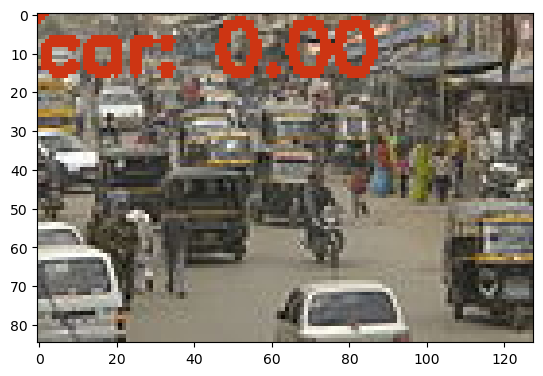

In [92]:
cv2.rectangle(image,(upperleftx,upperlefty),(lowerrighty,lowerrightx),colors[classes_indexes],3)
yposition=upperlefty-15 if upperlefty>30 else upperlefty+15
cv2.putText(image,prediction,(upperleftx,yposition),cv2.FONT_HERSHEY_SIMPLEX,0.6,colors[classes_indexes],2)
img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()